In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Data
data = {
    'Ukuran': [5, 6, 7, 8, 5, 6],
    'Tekstur': ['Halus', 'Halus', 'Kasar', 'Kasar', 'Kasar', 'Halus'],
    'Label': ['Apel', 'Apel', 'Jeruk', 'Jeruk', 'Jeruk', 'Apel']
}

df = pd.DataFrame(data)


In [ ]:
print(df)

   Ukuran Tekstur  Label
0       5   Halus   Apel
1       6   Halus   Apel
2       7   Kasar  Jeruk
3       8   Kasar  Jeruk
4       5   Kasar  Jeruk
5       6   Halus   Apel


In [ ]:
le_tekstur = LabelEncoder()
le_label = LabelEncoder()

df['Tekstur_encoded'] = le_tekstur.fit_transform(df['Tekstur'])  # Halus=0, Kasar=1
df['Label_encoded'] = le_label.fit_transform(df['Label'])        # Apel=0, Jeruk=1


In [ ]:
print(df)

   Ukuran Tekstur  Label  Tekstur_encoded  Label_encoded
0       5   Halus   Apel                0              0
1       6   Halus   Apel                0              0
2       7   Kasar  Jeruk                1              1
3       8   Kasar  Jeruk                1              1
4       5   Kasar  Jeruk                1              1
5       6   Halus   Apel                0              0


In [ ]:
X = df[['Ukuran', 'Tekstur_encoded']]  # Fitur
y = df['Label_encoded']                # Target


In [ ]:
model = RandomForestClassifier(n_estimators=3, random_state=42)
model.fit(X, y)


RandomForestClassifier(n_estimators=3, random_state=42)

In [ ]:
ukuran_baru = 7
tekstur_baru = le_tekstur.transform(['Halus'])[0]

prediksi = model.predict([[ukuran_baru, tekstur_baru]])
label_prediksi = le_label.inverse_transform(prediksi)

print("Prediksi buah:", label_prediksi[0])


Prediksi buah: Jeruk


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt


In [ ]:
# Ambil salah satu pohon dari random forest
first_tree = model.estimators_[0]

# Tampilkan struktur pohon dalam bentuk teks
print(export_text(first_tree, feature_names=['Ukuran', 'Tekstur_encoded']))


|--- Tekstur_encoded <= 0.50
|   |--- class: 0.0
|--- Tekstur_encoded >  0.50
|   |--- class: 1.0



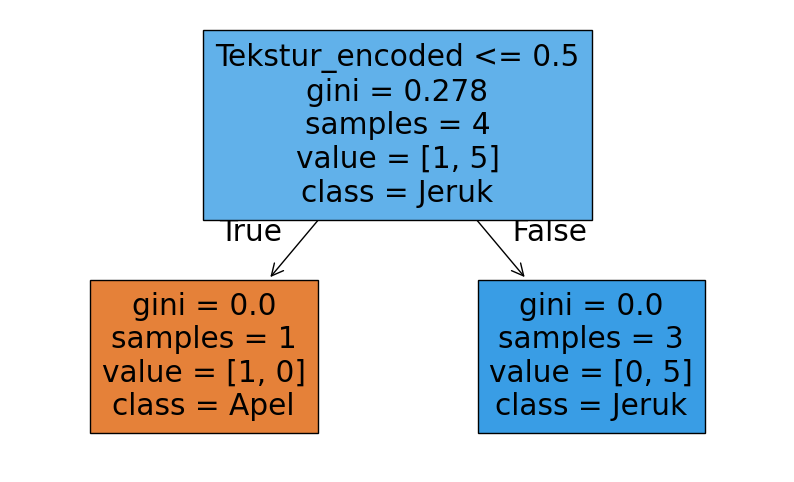

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(first_tree, feature_names=['Ukuran', 'Tekstur_encoded'],
          class_names=le_label.classes_, filled=True)
plt.show()


In [ ]:
importances = model.feature_importances_
fitur = ['Ukuran', 'Tekstur_encoded']

for f, imp in zip(fitur, importances):
    print(f"{f}: {imp:.3f}")


Ukuran: 0.467
Tekstur_encoded: 0.533


DECISION TREE

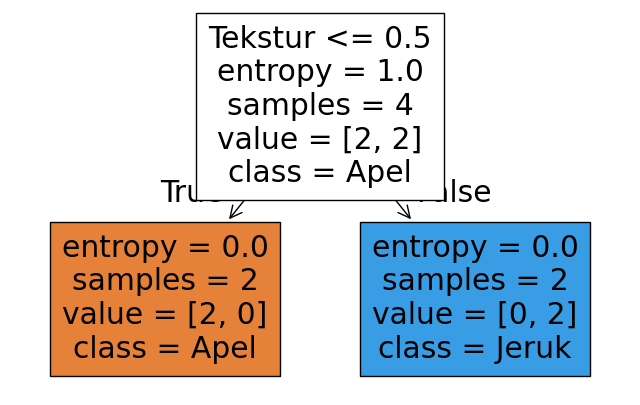

In [ ]:
# 1. Import library
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# 2. Data sederhana
data = {
    'Ukuran': [5, 6, 7, 8],
    'Tekstur': ['Halus', 'Halus', 'Kasar', 'Kasar'],
    'Label': ['Apel', 'Apel', 'Jeruk', 'Jeruk']
}

df = pd.DataFrame(data)

# 3. Ubah data kategorikal jadi numerik
# Halus = 0, Kasar = 1 | Apel = 0, Jeruk = 1
df['Tekstur_encoded'] = df['Tekstur'].map({'Halus': 0, 'Kasar': 1})
df['Label_encoded'] = df['Label'].map({'Apel': 0, 'Jeruk': 1})

# 4. Fitur & target
X = df[['Ukuran', 'Tekstur_encoded']]
y = df['Label_encoded']

# 5. Buat dan latih model Decision Tree
model = DecisionTreeClassifier(criterion='entropy')  # atau gini
model.fit(X, y)

# 6. Visualisasi pohon
plt.figure(figsize=(8, 5))
plot_tree(model,
          feature_names=['Ukuran', 'Tekstur'],
          class_names=['Apel', 'Jeruk'],
          filled=True)
plt.show()
